# 🌐 How to Connect Colab to Your Local Machine

## 📖 Description
Learn how to connect Google Colab to a local runtime for executing code on your hardware.  
[🔗 Click here for detailed instructions!](https://research.google.com/colaboratory/local-runtimes.html)

# 🌟 Exercise of This Session 🌟

## 📥 Download Exercise 07

### 📋 Exercise Instructions
[![Instructions](https://img.shields.io/badge/View%20Instructions-Click%20Here-blue)](https://drive.google.com/file/d/1qkBSh6IYXnHFqn2LHQiOyXludYoiOdyx/view?usp=sharing)

### 📂 Exercise Files
[![Download](https://img.shields.io/badge/Download%20Files-Click%20Here-green)](https://drive.google.com/file/d/1NhRz8tK6J2H8nuLceGCURNm230oxlyXS/view?usp=sharing)

# Expert-N run in Python

### Excercise 07-01

In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 preparation -----------------------------------------------------------

# Importing necessary libraries
from datetime import datetime

settings = {}
path = {}

settings['plot_query'] = True  # TRUE - Plotting, FALSE - No Plotting.

# Set paths
path['expertn_bin'] = "Y:/expertn5.15f/built/bin"
path['expertn_built'] = "Y:/expertn5.15f/built"
path['project'] = "Y:/expertn5.15f/Exercise 07/solved/EC2_2013_Crop/EC2_2013_Crop"
path['xpn'] = "EC2_2013_Crop.xpn"
path['output'] = f"{path['project']}/output"
path['obs'] = "Y:/expertn5.15f/Exercise 07/solved/ex7_evaluation/ex7_evaluation/Ex7_observations.xlsx"
path['xno'] = [f for f in os.listdir(path['output']) if f.endswith("1_1_1_0.xno")][0]

path['callXN'] = f"{path['expertn_bin']}/expertn_bin_term.exe --base-dir={path['expertn_built']} --config-file=\"{path['project']}/{path['xpn']}\""

# Read observation data from Excel
settings['obs'] = pd.read_excel(path['obs'], sheet_name="observations")


# 2 call Expert-N ---------------------------------------------------------
subprocess.run(path['callXN'], shell=True)

# 3 get simulation results ------------------------------------------------
# Read simulated data
dat = pd.read_csv(path['output']+'/'+path['xno'])

# Calculate above ground biomass
dat['output.Plant.Biomass.Abv.Ground [kg/ha]'] = dat['output.Plant.Biomass.Stem [kg/ha]'] + dat['output.Plant.Biomass.Leaves [kg/ha]']

# Calculate water stress
dat['waterstress'] = np.where(
    dat["output.Plant.Transpiration Day.Potential Transpiration [mm]"] > 0,
    dat["output.Plant.Transpiration Day.Actual Transpiration [mm]"] /
    dat["output.Plant.Transpiration Day.Potential Transpiration [mm]"],
    1
)

# Assign time vector for neater plots
time = pd.to_datetime(dat['Time and Date'])

# 4 plot ------------------------------------------------------------------
if settings['plot_query']:
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()

    # BBCH stage plot
    axs[0].plot(time, dat["output.Plant.Development Stage.BBCH Stage [-]"], lw=2, color="#6495ED")  # cornflowerblue
    obs_data = settings['obs'][settings['obs']['TYPE'] == 1.02]
    axs[0].errorbar(obs_data['X'], obs_data['Y'], yerr=obs_data['SD'], fmt='o', color='orange')
    axs[0].set_title("Development Stages")
    axs[0].set_xlabel("date")
    axs[0].set_ylabel("BBCH [-]")
    axs[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

    # Biomass plot
    axs[1].plot(time, dat['output.Plant.Biomass.Abv.Ground [kg/ha]'], lw=2, color="#7FFF00")  # chartreuse3
    axs[1].plot(time, dat['output.Plant.Biomass.Fruits [kg/ha]'], lw=2, color="#00BFFF")  # deepskyblue
    obs_biomass_veg = settings['obs'][settings['obs']['TYPE'] == 1.07]
    axs[1].errorbar(obs_biomass_veg['X'], obs_biomass_veg['Y'], yerr=obs_biomass_veg['SD'], fmt='o', color='#4CAF50')  # chartreuse4
    obs_biomass_gen = settings['obs'][settings['obs']['TYPE'] == 1.08]
    axs[1].errorbar(obs_biomass_gen['X'], obs_biomass_gen['Y'], yerr=obs_biomass_gen['SD'], fmt='^', color='#1E90FF')  # deepskyblue3
    axs[1].set_title("Biomass")
    axs[1].set_xlabel("date")
    axs[1].set_ylabel("Biomass [kg/ha]")
    axs[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

    # LAI plot
    axs[2].plot(time, dat["output.Plant.Leaf Area Index.LAI [m2/m2]"], lw=2, color="#6B8E23")  # darkolivegreen3
    obs_lai = settings['obs'][settings['obs']['TYPE'] == 1.03]
    axs[2].errorbar(obs_lai['X'], obs_lai['Y'], yerr=obs_lai['SD'], fmt='o', color='#556B2F')  # darkolivegreen
    axs[2].set_title("Leaf Area Index")
    axs[2].set_xlabel("date")
    axs[2].set_ylabel("LAI [m2/m2]")
    axs[2].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

    # Water stress plot
    axs[3].plot(time, dat['waterstress'], lw=2, color="#8B4513")  # brown3
    axs[3].set_title("Water Stress")
    axs[3].set_xlabel("date")
    axs[3].set_ylabel("Tact/Tpot")
    axs[3].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

    plt.tight_layout()
    plt.show()

,Time and Date,pTi.pSimTime.fTimeY,output.Plant.Root respiration. kg CO2 - C ha-1 d-1,output.Plant.Development Stage.BBCH Stage [-],output.Plant.N and Water Uptake.N Uptake [kgN/ha],output.Plant.N and Water Uptake.Water Uptake [mm],output.Plant.Biomass.Roots [kg/ha],output.Plant.Biomass.Stem [kg/ha],output.Plant.Biomass.Branches [kg/ha],output.Plant.Biomass.Leaves [kg/ha],...,output.Plant.Height.Height [m],output.Plant.Plant Density.Plant_Density [Plants/ha],output.Plant.Photosynthesis and Respiration Day.Gross Photosynthesis [kg (CO2)/ha/d],output.Plant.Photosynthesis and Respiration Cum.Gross Photosynthesis [kg (CO2)/ha],output.Plant.Photosynthesis and Respiration Day.Net Photosynthesis [kg (CO2)/ha/d],output.Plant.Photosynthesis and Respiration Cum.Net Photosynthesis [kg (CO2)/ha],output.Plant.Grain Number.Grains per plant [#],output.Plant.Grain Number.Grains per square meter [#/m2],output.Plant.Biomass.Abv.Ground [kg/ha],waterstress
0,2012-10-02 00:00:00,275.0,0.0,0.0,0.0,0.0,43.875,0.0,0.0,43.875,...,0.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,43.875,1.0
1,2012-10-03 00:00:00,276.0,0.0,0.0,0.0,0.0,43.875,0.0,0.0,43.875,...,0.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,43.875,1.0
2,2012-10-04 00:00:00,277.0,0.0,0.0,0.0,0.0,43.875,0.0,0.0,43.875,...,0.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,43.875,1.0
3,2012-10-05 00:00:00,278.0,0.0,0.0,0.0,0.0,43.875,0.0,0.0,43.875,...,0.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,43.875,1.0
4,2012-10-06 00:00:00,279.0,0.0,0.0,0.0,0.0,43.875,0.0,0.0,43.875,...,0.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,43.875,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2013-08-10 00:00:00,221.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0
313,2013-08-11 00:00:00,222.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0
314,2013-08-12 00:00:00,223.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0
315,2013-08-13 00:00:00,224.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0


### Excercise 07-02

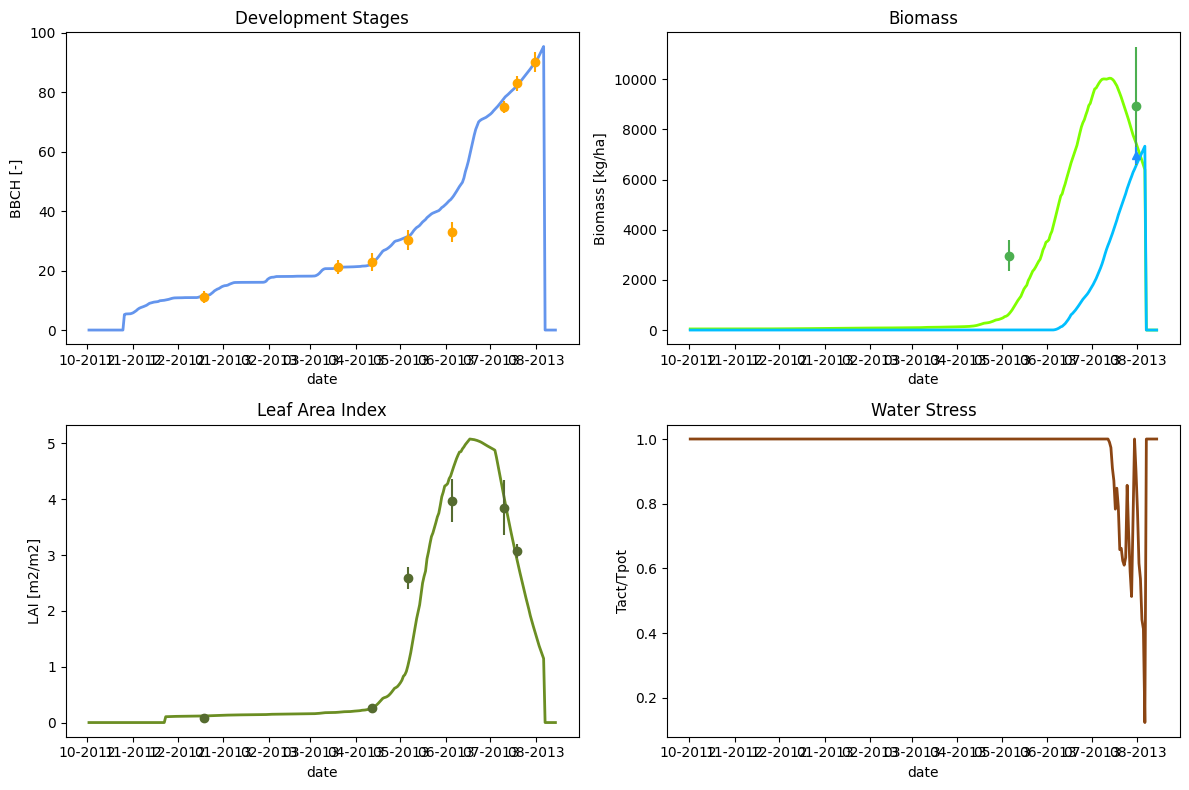

In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 preparation -----------------------------------------------------------

# Importing necessary libraries
from datetime import datetime

settings = {}
path = {}

settings['plot_query'] = True  # TRUE - Plotting, FALSE - No Plotting.

# Set paths
path['expertn_bin'] = "Y:/expertn5.15f/built/bin"
path['expertn_built'] = "Y:/expertn5.15f/built"
path['project'] = "Y:/expertn5.15f/Exercise 07/solved/EC2_2013_Crop/EC2_2013_Crop"
path['xpn'] = "EC2_2013_Crop.xpn"
path['output'] = f"{path['project']}/output"
path['obs'] = "Y:/expertn5.15f/Exercise 07/solved/ex7_evaluation/ex7_evaluation/Ex7_observations.xlsx"
path['xno'] = [f for f in os.listdir(path['output']) if f.endswith("1_1_2_0.xno")][0]

path['callXN'] = f"{path['expertn_bin']}/expertn_bin_term.exe --base-dir={path['expertn_built']} --config-file=\"{path['project']}/{path['xpn']}\""

# Read observation data from Excel
settings['obs'] = pd.read_excel(path['obs'], sheet_name="observations")


# 2 call Expert-N ---------------------------------------------------------
subprocess.run(path['callXN'], shell=True)

# 3 get simulation results ------------------------------------------------
# Read simulated data
dat = pd.read_csv(path['output']+'/'+path['xno'])

# Calculate above ground biomass
dat['output.Plant.Biomass.Abv.Ground [kg/ha]'] = dat['output.Plant.Biomass.Stem [kg/ha]'] + dat['output.Plant.Biomass.Leaves [kg/ha]']

# Calculate water stress
dat['waterstress'] = np.where(
    dat["output.Plant.Transpiration Day.Potential Transpiration [mm]"] > 0,
    dat["output.Plant.Transpiration Day.Actual Transpiration [mm]"] /
    dat["output.Plant.Transpiration Day.Potential Transpiration [mm]"],
    1
)

# Assign time vector for neater plots
time = pd.to_datetime(dat['Time and Date'])

# 4 plot ------------------------------------------------------------------
if settings['plot_query']:
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()

    # BBCH stage plot
    axs[0].plot(time, dat["output.Plant.Development Stage.BBCH Stage [-]"], lw=2, color="#6495ED")  # cornflowerblue
    obs_data = settings['obs'][settings['obs']['TYPE'] == 1.02]
    axs[0].errorbar(obs_data['X'], obs_data['Y'], yerr=obs_data['SD'], fmt='o', color='orange')
    axs[0].set_title("Development Stages")
    axs[0].set_xlabel("date")
    axs[0].set_ylabel("BBCH [-]")
    axs[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

    # Biomass plot
    axs[1].plot(time, dat['output.Plant.Biomass.Abv.Ground [kg/ha]'], lw=2, color="#7FFF00")  # chartreuse3
    axs[1].plot(time, dat['output.Plant.Biomass.Fruits [kg/ha]'], lw=2, color="#00BFFF")  # deepskyblue
    obs_biomass_veg = settings['obs'][settings['obs']['TYPE'] == 1.07]
    axs[1].errorbar(obs_biomass_veg['X'], obs_biomass_veg['Y'], yerr=obs_biomass_veg['SD'], fmt='o', color='#4CAF50')  # chartreuse4
    obs_biomass_gen = settings['obs'][settings['obs']['TYPE'] == 1.08]
    axs[1].errorbar(obs_biomass_gen['X'], obs_biomass_gen['Y'], yerr=obs_biomass_gen['SD'], fmt='^', color='#1E90FF')  # deepskyblue3
    axs[1].set_title("Biomass")
    axs[1].set_xlabel("date")
    axs[1].set_ylabel("Biomass [kg/ha]")
    axs[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

    # LAI plot
    axs[2].plot(time, dat["output.Plant.Leaf Area Index.LAI [m2/m2]"], lw=2, color="#6B8E23")  # darkolivegreen3
    obs_lai = settings['obs'][settings['obs']['TYPE'] == 1.03]
    axs[2].errorbar(obs_lai['X'], obs_lai['Y'], yerr=obs_lai['SD'], fmt='o', color='#556B2F')  # darkolivegreen
    axs[2].set_title("Leaf Area Index")
    axs[2].set_xlabel("date")
    axs[2].set_ylabel("LAI [m2/m2]")
    axs[2].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

    # Water stress plot
    axs[3].plot(time, dat['waterstress'], lw=2, color="#8B4513")  # brown3
    axs[3].set_title("Water Stress")
    axs[3].set_xlabel("date")
    axs[3].set_ylabel("Tact/Tpot")
    axs[3].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

    plt.tight_layout()
    plt.show()

### Excercise 07-03

In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0 preparation -----------------------------------------------------------

# Clean up (no equivalent in Python, but we can start fresh)
settings = {}
path = {}

settings['plot_query'] = True  # TRUE - Plotting, FALSE - No Plotting.

# Set paths
path['expertn_bin'] = "Y:/expertn5.15f/built/bin"
path['expertn_built'] = "Y:/expertn5.15f/built"
path['project'] = "Y:/expertn5.15f/Exercise 07/solved/EC2_2013_Crop_N_variations/EC2_2013_Crop_N_variations"
path['xpn'] = "EC2_2013_Crop_N_variations.xpn"
path['output'] = f"{path['project']}/output"
path['obs'] = "Y:/expertn5.15f/Exercise 07/solved/ex7_evaluation/ex7_evaluation/Ex7_observations.xlsx"
path['xno'] = [f for f in os.listdir(path['output']) if f.endswith('.xno')][0]

path['callXN'] = f"{path['expertn_bin']}/expertn_bin_term.exe --base-dir={path['expertn_built']} --config-file=\"{path['project']}/{path['xpn']}\""

# Read observation data from Excel
settings['obs'] = pd.read_excel(path['obs'], sheet_name="observations")

# Additional setup for fertilization sensitivity project
path['fert_ini'] = [f for f in os.listdir(path['project']) if 'fertilization.ini' in f][0]
path['fert_tpl'] = [f for f in os.listdir(path['project']) if 'fertilization.tpl' in f][0]
with open(os.path.join(path['project'], path['fert_tpl']), 'r') as file:
    settings['fert_tpl'] = file.readlines()
settings['fert_levels'] = [0, 50, 100, 150, 178, 200, 300, 400]
settings['dat_sens'] = np.full((len(settings['fert_levels']), 9), np.nan)

# 1 change fertilization.ini ----------------------------------------------
for ifert in range(len(settings['fert_levels'])):

    # Assign the tpl
    settings['fert_ifert'] = settings['fert_tpl'][:]

    # Get position of tpl
    settings['n_no3'] = [i for i, line in enumerate(settings['fert_ifert']) if "$no3" in line]
    settings['n_nh4'] = [i for i, line in enumerate(settings['fert_ifert']) if "$nh4" in line]

    # Replace values: half of the total N
    settings['fert_ifert'][settings['n_no3'][0]] = settings['fert_ifert'][settings['n_no3'][0]].replace('$no3n', str(settings['fert_levels'][ifert] * 0.5))
    settings['fert_ifert'][settings['n_nh4'][0]] = settings['fert_ifert'][settings['n_nh4'][0]].replace('$nh4n', str(settings['fert_levels'][ifert] * 0.5))

    # Write to fertilization.ini
    with open(path['fert_ini'], 'w') as file:
        file.writelines(settings['fert_ifert'])

    # 2 call Expert-N ---------------------------------------------------------
    subprocess.run(path['callXN'], shell=True)

    # 3 get simulation results ------------------------------------------------
    dat = pd.read_csv(path['output']+'/'+path['xno'])

    # Calculate above ground biomass
    dat["output.Plant.Biomass.Abv.Ground [kg/ha]"] = dat["output.Plant.Biomass.Stem [kg/ha]"] + dat["output.Plant.Biomass.Leaves [kg/ha]"]

    # Calculate water stress
    dat['waterstress'] = np.where(
        dat["output.Plant.Transpiration Day.Potential Transpiration [mm]"] > 0,
        dat["output.Plant.Transpiration Day.Actual Transpiration [mm]"] / dat["output.Plant.Transpiration Day.Potential Transpiration [mm]"],
        1
    )

    # Assign time vector for neater plots
    time = pd.to_datetime(dat['Time and Date'])

    # 4 plot ------------------------------------------------------------------
    if settings['plot_query']:
        fig, axs = plt.subplots(2, 2, figsize=(12, 8))
        axs = axs.flatten()

        # BBCH stage plot
        axs[0].plot(time, dat["output.Plant.Development Stage.BBCH Stage [-]"], lw=2, color="#6495ED")  # cornflowerblue
        obs_data = settings['obs'][settings['obs']['TYPE'] == 1.02]
        axs[0].errorbar(obs_data['X'], obs_data['Y'], yerr=obs_data['SD'], fmt='o', color='orange')
        axs[0].set_title("Development Stages")
        axs[0].set_xlabel("date")
        axs[0].set_ylabel("BBCH [-]")
        axs[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

        # Biomass plot
        axs[1].plot(time, dat['output.Plant.Biomass.Abv.Ground [kg/ha]'], lw=2, color="#7FFF00")  # chartreuse3
        axs[1].plot(time, dat['output.Plant.Biomass.Fruits [kg/ha]'], lw=2, color="#00BFFF")  # deepskyblue
        obs_biomass_veg = settings['obs'][settings['obs']['TYPE'] == 1.07]
        axs[1].errorbar(obs_biomass_veg['X'], obs_biomass_veg['Y'], yerr=obs_biomass_veg['SD'], fmt='o', color='#4CAF50')  # chartreuse4
        obs_biomass_gen = settings['obs'][settings['obs']['TYPE'] == 1.08]
        axs[1].errorbar(obs_biomass_gen['X'], obs_biomass_gen['Y'], yerr=obs_biomass_gen['SD'], fmt='^', color='#1E90FF')  # deepskyblue3
        axs[1].set_title("Biomass")
        axs[1].set_xlabel("date")
        axs[1].set_ylabel("Biomass [kg/ha]")
        axs[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

        # LAI plot
        axs[2].plot(time, dat["output.Plant.Leaf Area Index.LAI [m2/m2]"], lw=2, color="#6B8E23")  # darkolivegreen3
        obs_lai = settings['obs'][settings['obs']['TYPE'] == 1.03]
        axs[2].errorbar(obs_lai['X'], obs_lai['Y'], yerr=obs_lai['SD'], fmt='o', color='#556B2F')  # darkolivegreen
        axs[2].set_title("Leaf Area Index")
        axs[2].set_xlabel("date")
        axs[2].set_ylabel("LAI [m2/m2]")
        axs[2].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

        # Water stress plot
        axs[3].plot(time, dat['waterstress'], lw=2, color="#8B4513")  # brown3
        axs[3].set_title("Water Stress")
        axs[3].set_xlabel("date")
        axs[3].set_ylabel("Tact/Tpot")
        axs[3].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m-%Y"))

        plt.tight_layout()
        plt.show()

    # 5 collect information ---------------------------------------------------
    # a Yield
    settings['dat_sens'][ifert, 0] = max(dat['output.Plant.Biomass.Fruits [kg/ha]']) / 100

    # b veg. biomass
    settings['dat_sens'][ifert, 1] = max(dat['output.Plant.Biomass.Abv.Ground [kg/ha]']) / 100

    # c N conc grain
    settings['dat_sens'][ifert, 2] = dat['output.Plant.N Concentration.N in Fruits [-]'].replace(0, np.nan).last_valid_index() * 100

    # d N uptake
    settings['dat_sens'][ifert, 3] = max(dat['output.Plant.N and Water Uptake.N Uptake [kgN/ha]'])

    # e Tact
    settings['dat_sens'][ifert, 4] = sum(dat['output.Plant.Transpiration Day.Actual Transpiration [mm]'])

    # f Tpot
    settings['dat_sens'][ifert, 5] = sum(dat['output.Plant.Transpiration Day.Potential Transpiration [mm]'])

    # g Cumulative NH3 Volatilisation
    settings['dat_sens'][ifert, 6] = dat['output.Nitrogen.N Gaseous emissions cumulative.Cum NH3Volatilisation [kg (N)/ha]'].iloc[-1]

    # h Cumulative N2O Emission
    settings['dat_sens'][ifert, 7] = dat['output.Nitrogen.N Gaseous emissions cumulative.Cum N2O Emission [kg (N)/ha]'].iloc[-1]

    # i Cumulative NO3 leaching
    settings['dat_sens'][ifert, 8] = dat['output.Nitrogen.N Leaching cumulative.NO3 cumulative [kg (N)/ha]'].iloc[-1]

# 6 get results -----------------------------------------------------------
settings['dat_sens'] = pd.DataFrame(settings['dat_sens'], columns=[
    "Yield [dt/ha]", "veg Biomass [dt/ha]", "grain-N [%]",
    "N Uptake [kgN/ha]", "cum. Tact [mm]", "cum. Tpot [mm]",
    "cum NH3 Volatilisation [kg (N)/ha]", "cum N2O Emission [kg (N)/ha]",
    "cum NO3 leaching [kg (N)/ha]"
]).round(1)
settings['dat_sens']['fert_levels [kg (N)/ha]'] = settings['fert_levels']

# 6 Plot Results Sensitivity ----------------------------------------------
# Yield and grain N
x = settings['dat_sens']['fert_levels [kg (N)/ha]']

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(x, settings['dat_sens']['Yield [dt/ha]'], pch=15, color="#00BFFF")  # deepskyblue2
axs[0].set_ylim(0, 100)
axs[0].set_ylabel("Yield [dt/ha]")
axs[0].set_xlabel("Fertilisation Level [kg (N)/ha]")
axs[0].grid()

# Add observations
obs_yield = settings['obs'][settings['obs']['TYPE'] == 1.08]
axs[0].errorbar(178, obs_yield['Y'].mean(), yerr=obs_yield['SD'].mean(), fmt='o', color="#00BFFF")

axs[1].plot(x, settings['dat_sens']['grain-N [%]'], pch=17, color="#7FFF00")  # chartreuse4
axs[1].set_ylim(1.0, 3.0)
axs[1].set_ylabel("grain-N [%]")
axs[1].grid()

# Add observations
obs_grain_n = settings['obs'][settings['obs']['TYPE'] == 1.14]
axs[1].errorbar(178, obs_grain_n['Y'].mean(), yerr=obs_grain_n['SD'].mean(), fmt='o', color="#7FFF00")

plt.tight_layout()
plt.legend(["Yield", "grain-N [%]"], loc="best")
plt.show()

# N Emissions
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, settings['dat_sens']['cum NH3 Volatilisation [kg (N)/ha]'], pch=16, color="coral")  # coral2
ax.set_ylim(0, 40)
ax.set_ylabel("N Emission [kg (N)/ha]")
ax.set_xlabel("Fertilisation Level [kg (N)/ha]")
ax.grid()

ax.plot(x, settings['dat_sens']['cum N2O Emission [kg (N)/ha]'], pch=15, color="#00BFFF")  # deepskyblue2
ax.plot(x, settings['dat_sens']['cum NO3 leaching [kg (N)/ha]'], pch=17, color="#7FFF00")  # chartreuse4

plt.legend(["cum NH3 Volatilisation", "cum N2O Emission", "cum NO3 leaching"], loc="best")
plt.tight_layout()
plt.show()